## Togo 

### Imports required for data analysis 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Solar Data EDA – <Country>

**Objective**: Profile, clean, and explore Togo's solar dataset end-to-end so it’s ready for comparison and region-ranking tasks.

> Create Git Branch: `eda-togo`  
> Notebook Name: `togo_eda.ipynb`

---

## Phase 1: Business Understanding

- **Goal**: Understand solar energy patterns across African countries to rank regions for solar investment.
- **Dataset Purpose**: Use solar radiation and weather sensor data to estimate solar energy potential and reliability.
- **Key Business Questions**:
  - Which regions have the most consistent high solar radiation?
  - Are sensor readings (ModA/ModB) clean and reliable?
  - How does humidity or wind impact solar performance?


## 2. Data Understanding

In [41]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [42]:
# timestamp objects to datetime
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %M:%S')

# Extracting date and time from the timestamp
df['Date'] = df['Timestamp'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Timestamp'].dt.time
df['date'] = df["Timestamp"].dt.date

df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
print("Description of togo data")
print(df.describe())

print("Togo data info")
print(df.info())

Description of togo data
                           Timestamp  ...                           Date
count                         525600  ...                         525600
mean   2022-04-25 00:12:59.499999744  ...  2022-04-25 00:01:00.000000256
min              2021-10-25 00:00:01  ...            2021-10-25 00:00:00
25%    2022-01-24 00:06:00.750000128  ...            2022-01-24 00:00:00
50%       2022-04-25 00:12:00.500000  ...            2022-04-25 00:00:00
75%    2022-07-25 00:18:00.249999872  ...            2022-07-25 00:00:00
max              2022-10-25 00:00:00  ...            2022-10-25 00:00:00
std                              NaN  ...                            NaN

[8 rows x 20 columns]
Togo data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI     

In [ ]:
# data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

## 1. Data Prepration

In [ ]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from scripts.cleaning_impact import plot_cleaning_impact, plot_cleaning_timeseries
from scripts.correlation_analysis import plot_correlation_heatmap, plot_scatter_relationships
from scripts.temperature_analysis import plot_rh_temperature_relationship, plot_bubble_chart
from scripts.time_series import plot_daily_patterns, plot_seasonal_trends, detect_anomalies
from scripts.wind_analysis import plot_wind_rose, plot_wind_distributions



In [ ]:
# Import from src (feature engineering and data cleaning)
from src.featuring import SolarFeatureGenerator
from src.data_cleaner import SolarDataCleaner

In [ ]:
# Ensure the index is a DatetimeIndex and sorted
if not isinstance(df.index, pd.DatetimeIndex):
	df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

In [ ]:
cleaner = (
    SolarDataCleaner(df)
    .handle_missing_values(max_null_percentage=5)
    .add_time_features()
    .handle_outliers(columns=['GHI', 'DNI', 'DHI', 'Tamb'], method='iqr')
    .validate_physical_ranges()
)


/home/dandy/CodeFiles/KifiyaAI/week0/src/data_cleaner.py:44: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  self.df = self.df.interpolate(method='time', limit_direction='both')


## Cleaned data report

In [ ]:
cleaning_report = cleaner.get_cleaning_report()
print("Cleaning Report:")
print(cleaning_report)

Cleaning Report:
{'dropped_columns': ['Comments'], 'outliers_removed': np.int64(58397)}


## Export cleaned data

In [ ]:
import os

# Ensure the 'data/processed' directory exists before saving
os.makedirs('data/processed', exist_ok=True)

# Use the cleaned DataFrame from the SolarDataCleaner instance
clean_df = cleaner.df

clean_df.to_csv('data/processed/togo_clean.csv', index=True)
clean_df.to_pickle('data/processed/togo_clean.pkl')

## Time Series Analysis 

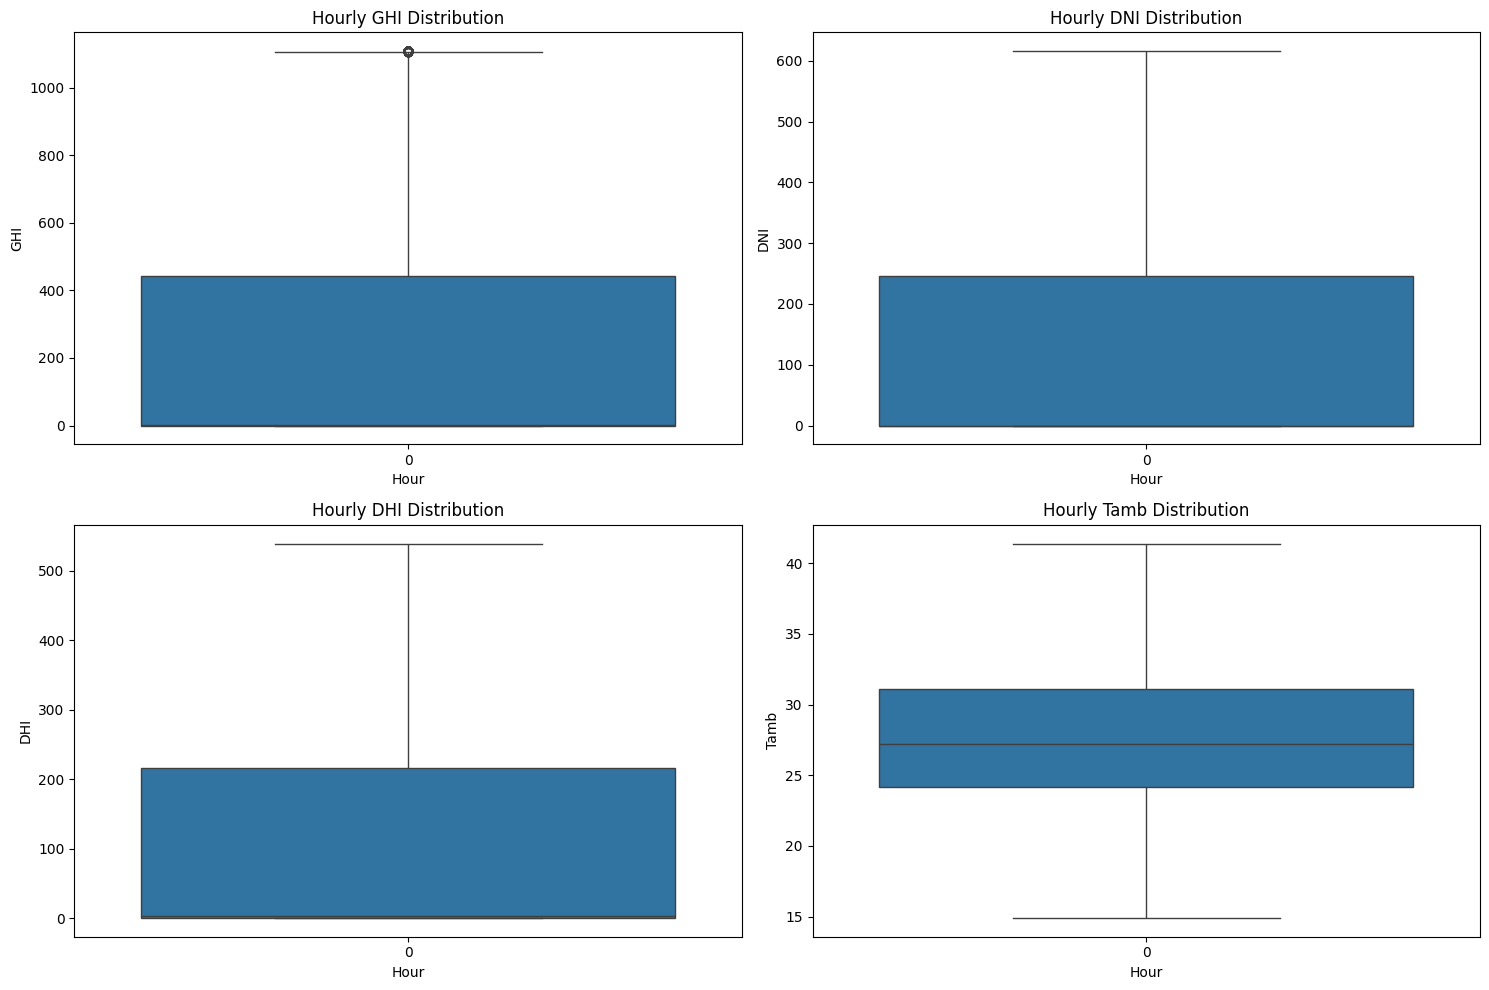

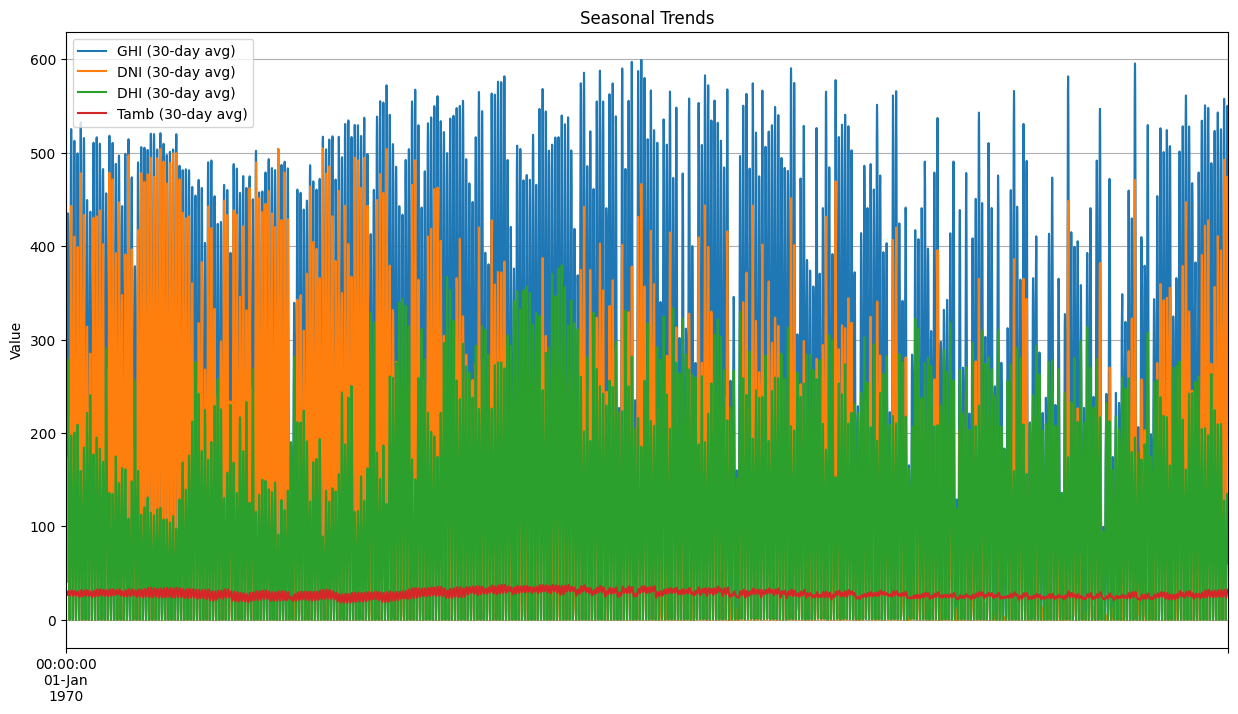

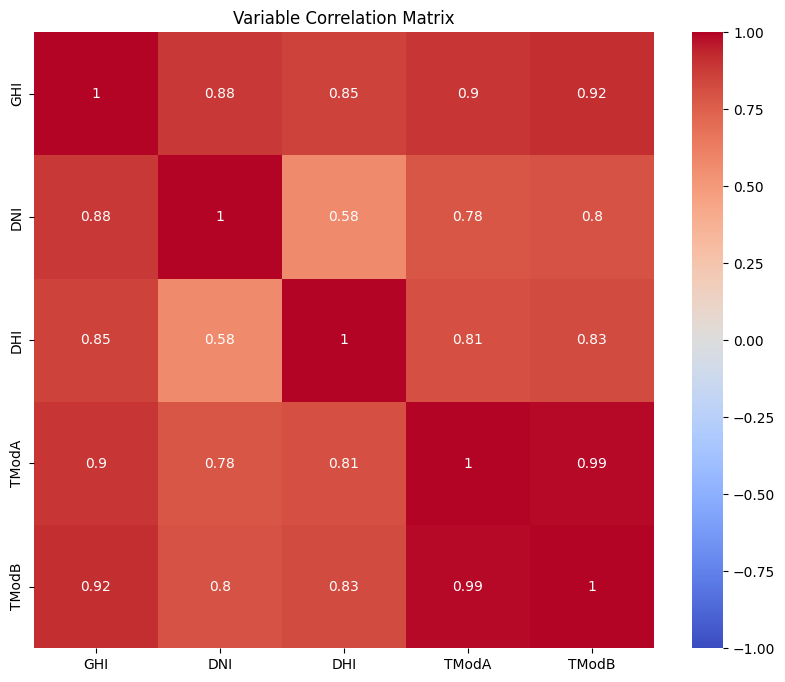

In [ ]:
# Ensure compatibility with plotting functions expecting 'Hour' instead of 'hour'
if 'Hour' not in clean_df.columns and 'hour' in clean_df.columns:
	clean_df = clean_df.copy()
	clean_df['Hour'] = clean_df['hour']

plot_daily_patterns(clean_df).show()
plot_seasonal_trends(clean_df).show()

# Correlation analysis
plot_correlation_heatmap(clean_df).show()

### Group by Cleaning flag and plot average ModA & ModB pre/post-clean.


/home/dandy/CodeFiles/KifiyaAI/week0/scripts/cleaning_impact.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Cleaning_Flag', y=mod, data=df, ci='sd')
/home/dandy/CodeFiles/KifiyaAI/week0/scripts/cleaning_impact.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Cleaning_Flag', y=mod, data=df, ci='sd')


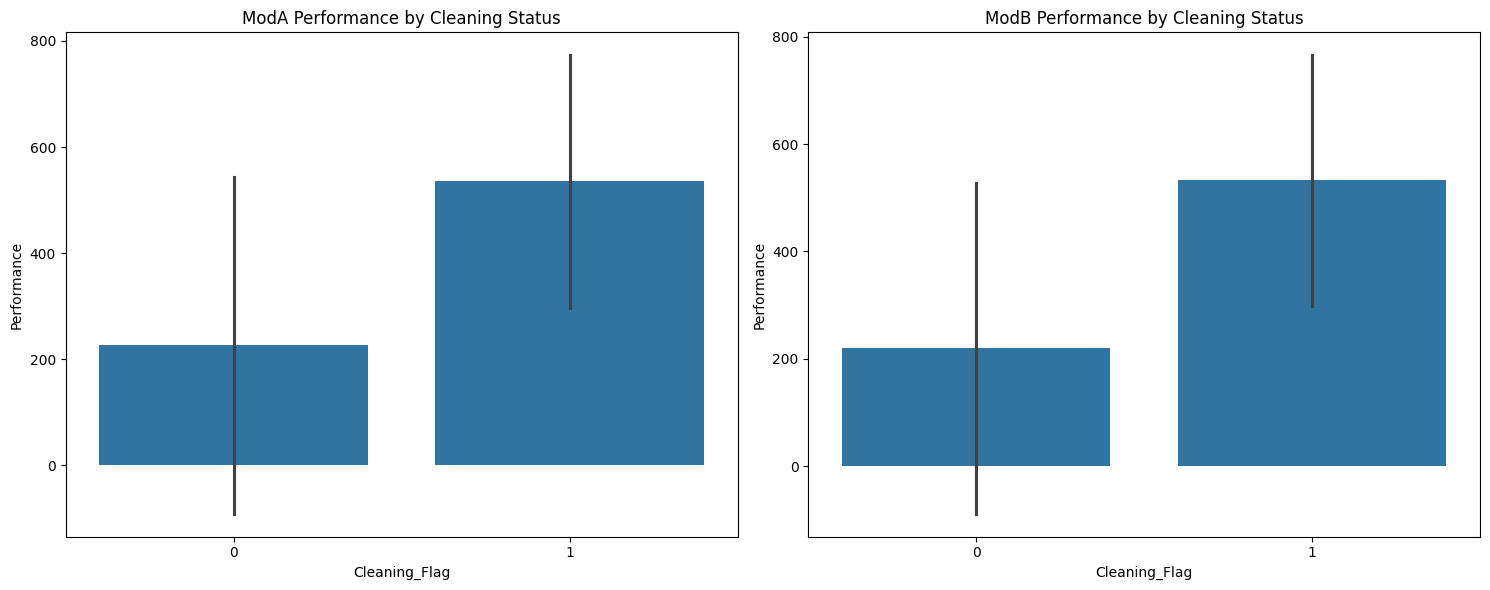

In [ ]:
#  average MoDA and ModB pre/post-clean

# Ensure the required column name for the plotting function
if 'Cleaning_Flag' not in clean_df.columns and 'Cleaning' in clean_df.columns:
	clean_df = clean_df.copy()
	clean_df.rename(columns={'Cleaning': 'Cleaning_Flag'}, inplace=True)

# Plotting the cleaning impact
cleanimpact = plot_cleaning_impact(clean_df)

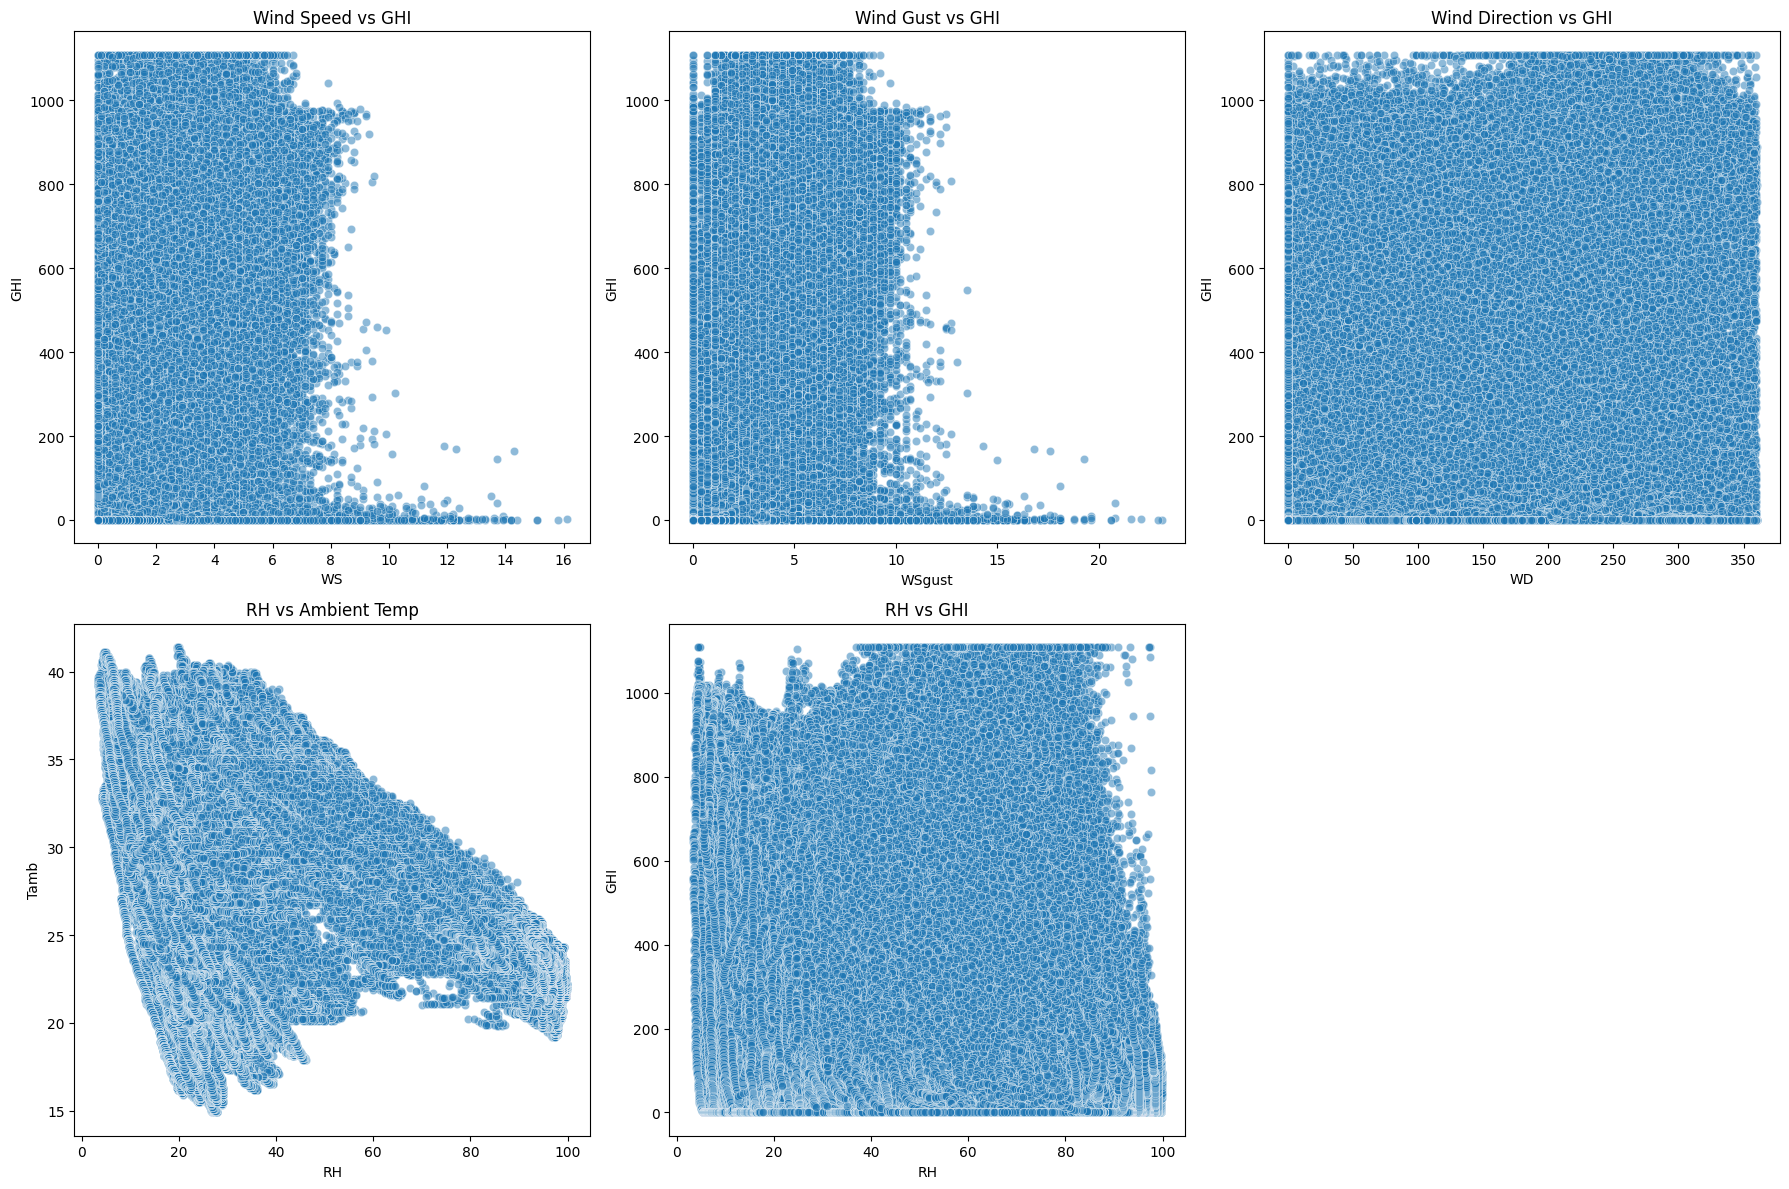

In [ ]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

plot_scatter_relationships(clean_df).show()

## wind rose analysis

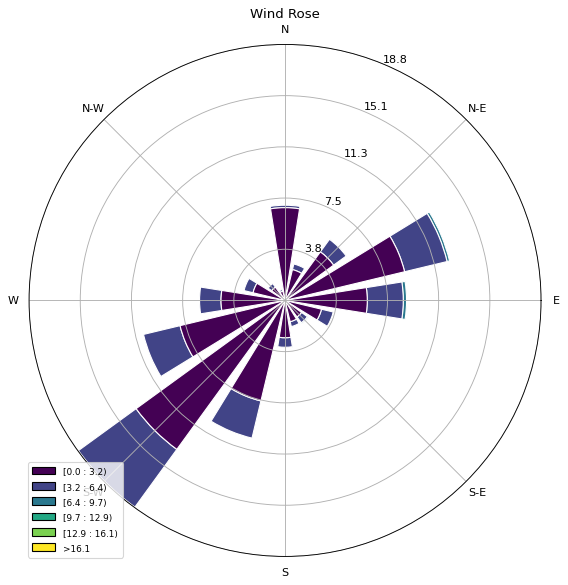

NameError: name 'sns' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
from scripts.wind_analysis import plot_ghi_histogram


plot_wind_rose(clean_df).show()

plot_ghi_histogram(clean_df).show()

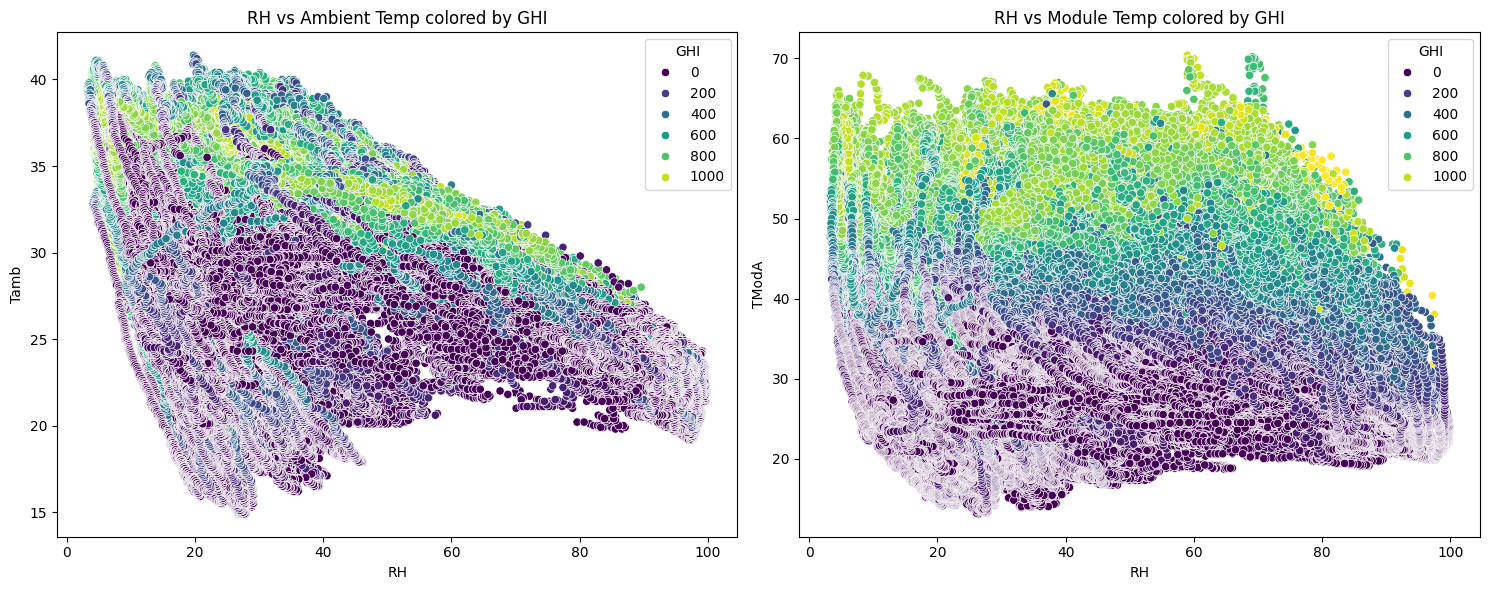

In [ ]:
plot_rh_temperature_relationship(clean_df).show()

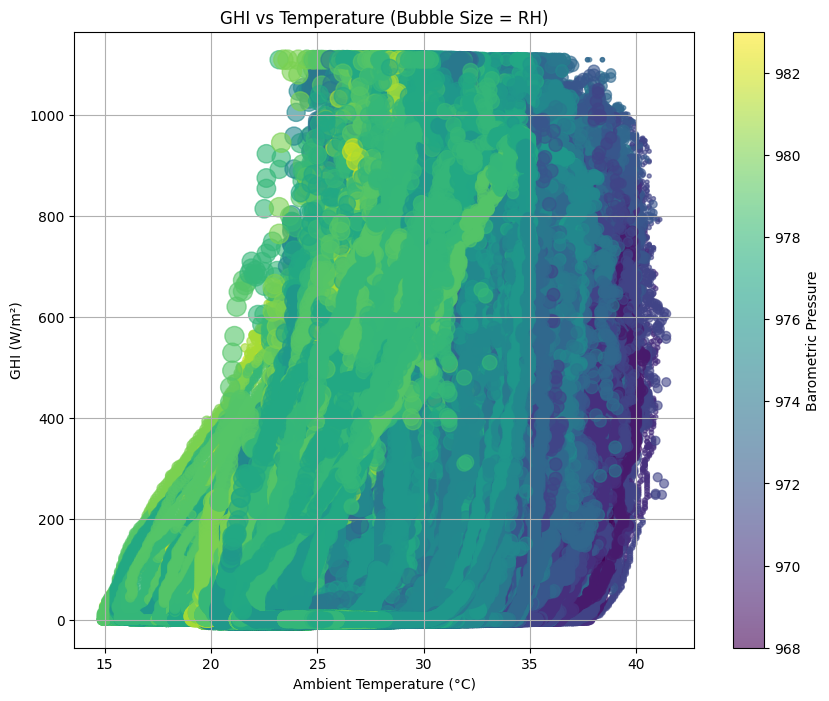

In [43]:
plot_bubble_chart(clean_df).show()